Get Accession numbers:
LC735021.1 

NM_001413646.1

ON312469.1

ON226487.1
    
    
Get all CDS from each accession and select those that have more than one
Get the stats of length, GC content and amount of adenines in their coded protein
Make a ~beautiful~ graph

In [1]:
# load up our libraries
from Bio import SeqIO
from Bio import Entrez

accession_list = ["LC735021.1", "NM_001413646.1", "ON226487.1", "ON312469.1",]

for accession in accession_list:
    Entrez.email = 'appropriate.address@provider.com' # replace with appropriate email address
    handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
    # dump to file system

    with open(f'{accession}.gb','w') as outfile:
        outfile.write(handle.read())   

In [2]:
%%bash
ls -ltr ON226487.1.gb

-rw-rw-r-- 1 josh josh 15811 Nov 17 10:39 ON226487.1.gb


In [3]:
%%bash
head -10 LC735021.1.gb

LOCUS       LC735021                 862 bp    mRNA    linear   MAM 28-OCT-2022
DEFINITION  Felis catus PDCD1LG2 mRNA for programmed cell death 1 ligand 2,
            complete cds.
ACCESSION   LC735021
VERSION     LC735021.1
KEYWORDS    .
SOURCE      Felis catus (domestic cat)
  ORGANISM  Felis catus
            Eukaryota; Metazoa; Chordata; Craniata; Vertebrata; Euteleostomi;
            Mammalia; Eutheria; Laurasiatheria; Carnivora; Feliformia; Felidae;


In [4]:
accession_list = ["LC735021.1", "NM_001413646.1", "ON226487.1", "ON312469.1",]
coding_seqs = []
protein_seqs = []
bigCDS = {}
from Bio import SeqIO
from Bio import Entrez

for accession in accession_list:
    handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=accession)
    for rec in SeqIO.parse(handle,'genbank'):
        if rec.features:
            CDS_count = 0
            for feature in rec.features:
                
                if feature.type == "CDS":
                    coding_seqs.append(feature.location.extract(rec).seq)
                    protein_seqs.append(feature.qualifiers["translation"])
                    CDS_count += 1
            if CDS_count > 1:
                bigCDS[accession] = CDS_count
       
                print(f"{accession} has {CDS_count} CDS!")
                
#prints the number of CDS of any accession numbers with more than one CDS 

ON226487.1 has 7 CDS!


In [5]:
print(bigCDS) #also creates a dictionary with the accession as a key and more-than-one CDS as a value

{'ON226487.1': 7}


In [6]:
bigCDScode = []
bigCDSprotein = []

for key in bigCDS:
    handle = Entrez.efetch(db="nucleotide", rettype='gb', retmode='text', id=key)
    for rec in SeqIO.parse(handle,'genbank'):
        if rec.features:
            CDS_count = 0
            for feature in rec.features:
                
                if feature.type == "CDS":
                    bigCDScode.append(feature.location.extract(rec).seq)
                    bigCDSprotein.append(feature.qualifiers["translation"])
                    
#uses the aforementioned dictionary to make a list of that accession no.s code and protein seqs

In [7]:
print(bigCDScode)
print(len(bigCDSprotein))

[Seq('ATGGCGAAGCCTACCTCCGTCGCGGGCGTTTGCGGGCGTTTGGGGATTTCTGTT...TGA'), Seq('ATGATTGGAAAGGAACCCCAAATCAAAGATATTGAATTAGATTTGGATGAGCTG...TAA'), Seq('ATGGCGGACAACAAGGAAAACGACCCTAAAAAAGGTACCAATGGGTCACCTCAA...TAG'), Seq('ATGGAGAACCTTAGCACCAGATTTGATACTCTGCAGGAGGTCCTGTTGGCACAT...TGA'), Seq('ATGTTAAGTTTGCAGCTGATGCTCTGCAATATGCTACCACAGGCATGTGGAGGG...TAG'), Seq('ATGACTTCGCGGGCCAAGCGTATCAAGCGTGACTCTGCCTCTAATTTGTACAGG...TAA'), Seq('ATGGTTTATAATTTCTTGCAGATGTCCTACTGGGTGCCTCAACAGGGCCAGGTG...TAA')]
7


In [8]:
count = 0
CDScodedict = {}

for code in bigCDScode:
    count += 1
    print(f" Coding sequence length for CDSequence {count} is {len(code)}!")
    CDScodedict[count] = len(code)
    
print(CDScodedict)

 Coding sequence length for CDSequence 1 is 414!
 Coding sequence length for CDSequence 2 is 306!
 Coding sequence length for CDSequence 3 is 1827!
 Coding sequence length for CDSequence 4 is 1335!
 Coding sequence length for CDSequence 5 is 582!
 Coding sequence length for CDSequence 6 is 1542!
 Coding sequence length for CDSequence 7 is 1533!
{1: 414, 2: 306, 3: 1827, 4: 1335, 5: 582, 6: 1542, 7: 1533}


In [9]:
def gc_percent(sequence):
    g = sequence.count('G')
    c = sequence.count('C')
    ratio = (g + c)/(len(sequence))
    return(ratio)

CDSGCdict = {}
count = 0
for code in bigCDScode:
    gccount = gc_percent(code)
    count += 1
    print(f"Coding sequence {count} has a GC ratio of {gccount}!")
    CDSGCdict[count] = gccount

print(CDSGCdict)

Coding sequence 1 has a GC ratio of 0.45410628019323673!
Coding sequence 2 has a GC ratio of 0.4803921568627451!
Coding sequence 3 has a GC ratio of 0.4362342638204707!
Coding sequence 4 has a GC ratio of 0.5415730337078651!
Coding sequence 5 has a GC ratio of 0.627147766323024!
Coding sequence 6 has a GC ratio of 0.5389105058365758!
Coding sequence 7 has a GC ratio of 0.4840182648401826!
{1: 0.45410628019323673, 2: 0.4803921568627451, 3: 0.4362342638204707, 4: 0.5415730337078651, 5: 0.627147766323024, 6: 0.5389105058365758, 7: 0.4840182648401826}


In [10]:
CDSAdict = {}
count = 0

for code in bigCDSprotein:
    count += 1
    codetocount = str(code)
    a = codetocount.count('A')
    print(f'Coding sequence {count} has {a} adenines!')
    CDSAdict[count] = a
    
print(CDSAdict)

Coding sequence 1 has 7 adenines!
Coding sequence 2 has 7 adenines!
Coding sequence 3 has 41 adenines!
Coding sequence 4 has 23 adenines!
Coding sequence 5 has 9 adenines!
Coding sequence 6 has 29 adenines!
Coding sequence 7 has 20 adenines!
{1: 7, 2: 7, 3: 41, 4: 23, 5: 9, 6: 29, 7: 20}


Text(0, 0.5, 'Length')

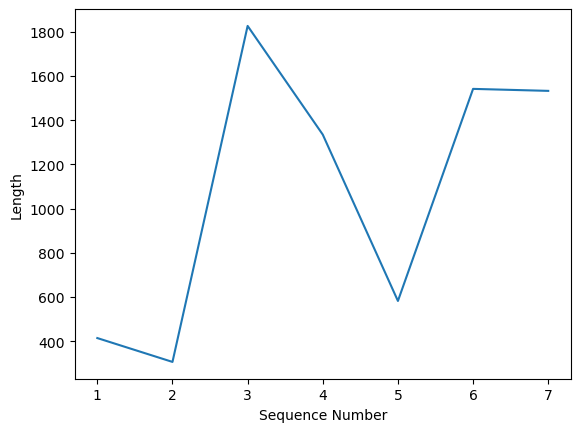

In [11]:
import matplotlib.pyplot as plt
#standback
#i'm beginning to graph

plt.plot(CDScodedict.keys(),CDScodedict.values())
plt.xlabel('Sequence Number')
plt.ylabel('Length')

Text(0.5, 1.0, "GC ratio in {'ON226487.1': 7}")

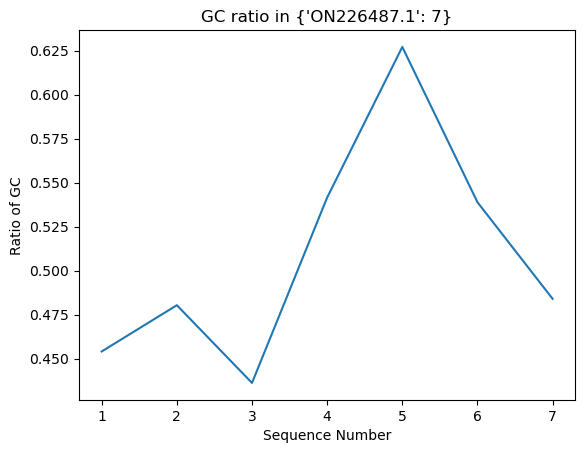

In [12]:

plt.plot(CDSGCdict.keys(),CDSGCdict.values())
plt.xlabel('Sequence Number')
plt.ylabel('Ratio of GC')
plt.title(f'GC ratio in {bigCDS}')

Text(0, 0.5, 'Number of adenines')

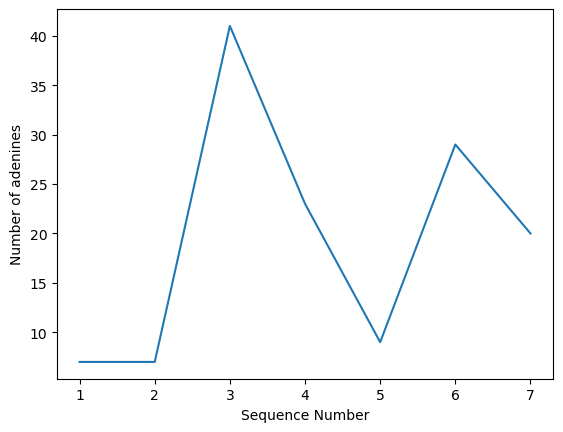

In [13]:
plt.plot(CDSAdict.keys(),CDSAdict.values())
plt.xlabel('Sequence Number')
plt.ylabel('Number of adenines')



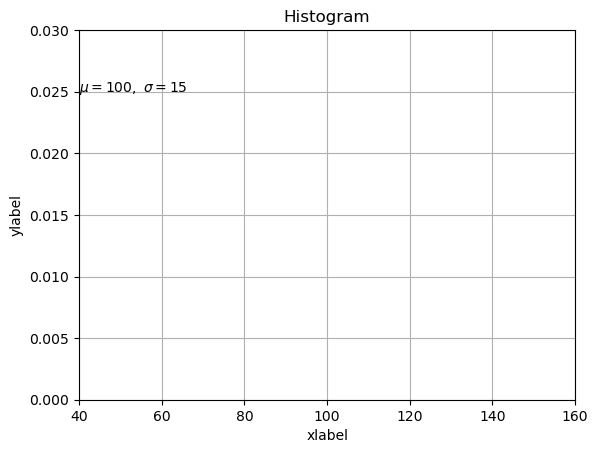

In [14]:
plt.hist(CDScodedict.keys(), 5, density=True, facecolor='g', alpha=0.75)


plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Histogram')
plt.text(40, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(40, 160)
plt.ylim(0, 0.03)
plt.grid(True)
plt.show()


zi = (xi – min(x)) / (max(x) – min(x))

where:

    zi: The ith normalized value in the dataset
    xi: The ith value in the dataset
    min(x): The minimum value in the dataset
    max(x): The maximum value in the dataset


In [15]:
length = []
for value in CDScodedict.values():
    length.append(value)

print(length)

normal_length = []
for l in length:
    x = l - min(length)
    y = max(length) - min(length)
    normal = x / y
    normal_length.append(normal)
    
print(normal_length)

#normalised seq lengths

[414, 306, 1827, 1335, 582, 1542, 1533]
[0.07100591715976332, 0.0, 1.0, 0.6765285996055227, 0.1814595660749507, 0.8126232741617357, 0.8067061143984221]


In [16]:
gccount = []
for value in CDSGCdict.values():
    gccount.append(value)

print(gccount)

normal_gc = []
for gc in gccount:
    x = gc - min(gccount)
    y = max(gccount) - min(gccount)
    normal = x / y
    normal_gc.append(normal)
    
print(normal_gc)

#normalised GC count, but they're already under 1 so idk if it's necessary

[0.45410628019323673, 0.4803921568627451, 0.4362342638204707, 0.5415730337078651, 0.627147766323024, 0.5389105058365758, 0.4840182648401826]
[0.09361316061197403, 0.2312979043568897, 0.0, 0.5517617586319522, 1.0, 0.5378155063428891, 0.2502913643788649]


In [17]:
acount = []
for value in CDSAdict.values():
    acount.append(value)

print(acount)

normal_a = []
for a in acount:
    x = a - min(acount)
    y = max(acount) - min(acount)
    normal = x / y
    normal_a.append(normal)
    
print(normal_a)

#normalised GC count, but they're already under 1 so idk if it's necessary

[7, 7, 41, 23, 9, 29, 20]
[0.0, 0.0, 1.0, 0.47058823529411764, 0.058823529411764705, 0.6470588235294118, 0.38235294117647056]


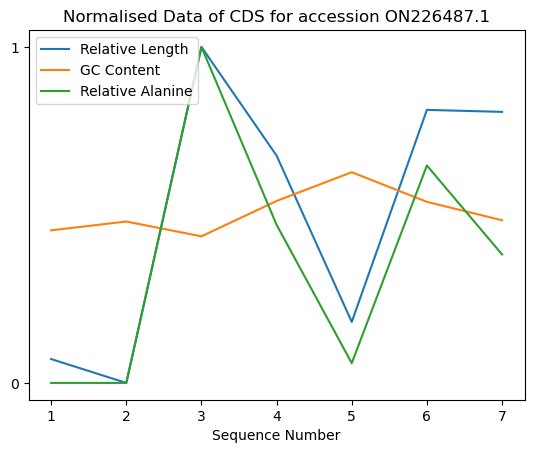

In [18]:
import matplotlib.pyplot as plt

plt.plot(CDScodedict.keys(),normal_length, label = "Relative Length")
plt.plot(CDSGCdict.keys(),gccount, label = "GC Content")
plt.plot(CDSAdict.keys(),normal_a, label = "Relative Alanine")
plt.xlabel('Sequence Number')
plt.title("Normalised Data of CDS for accession ON226487.1")
plt.legend(loc="upper left")
plt.yticks([0,1]) 
plt.show()